# Bayesian Networks for Predicting Cardiovascular Diseases #

## Group 10 ##
**Francisco Papoula - FC58206** 

**António Almeida   - FC58235**

In [16]:
from pgmpy.models import BayesianNetwork
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt
from pgmpy.estimators import MaximumLikelihoodEstimator
import numpy as np
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore, K2Score, BDeuScore, AICScore
from pgmpy.base import DAG
from imblearn.over_sampling import SMOTENC
import matplotlib.pyplot as plt

Load the datasets

In [17]:
train_data = pd.read_csv('cardiovascular_train.csv')
test_data = pd.read_csv('cardiovascular_test.csv')

## Step 1: Exploratory Data Analysis (EDA) ##
The dataset used for this study provides key insights into cardiovascular risk factors, grouped into non-modifiable factors, modifiable factors, and medical conditions. Understanding these distributions is essential for modeling and prediction.


**Identification off the variables and their unique values:**

In [18]:
for column in train_data.columns:
    unique_values = train_data[column].unique()
    print(f"{column}: {unique_values}")

Age: ['54-64' '24-34' '34-44' '44-54' '64-74' '18-24']
Anxiety: ['No' 'Yes']
BodyMassIndex: ['Overweight' 'Obese' 'Normal' 'Underweight']
Depression: ['No' 'Yes']
Diabetes: ['No' 'Yes']
EducationLevel: [2 3 1]
Hypercholesterolemia: ['No' 'Yes']
Hypertension: ['No' 'Yes']
PhysicalActivity: ['Regularly Active' 'Insufficiently Active']
Sex: ['Male' 'Female']
SleepDuration: ['6-9hours' '<6hours' '>9hours']
SmokerProfile: ['Smoker' 'Non_Smoker' 'Ex_Smoker']
SocioeconomicStatus: [3 1 2]


description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3845 entries, 0 to 3844
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   3845 non-null   object
 1   Anxiety               3845 non-null   object
 2   BodyMassIndex         3845 non-null   object
 3   Depression            3845 non-null   object
 4   Diabetes              3845 non-null   object
 5   EducationLevel        3845 non-null   int64 
 6   Hypercholesterolemia  3845 non-null   object
 7   Hypertension          3845 non-null   object
 8   PhysicalActivity      3845 non-null   object
 9   Sex                   3845 non-null   object
 10  SleepDuration         3845 non-null   object
 11  SmokerProfile         3845 non-null   object
 12  SocioeconomicStatus   3845 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 390.6+ KB
Statistics
       EducationLevel  SocioeconomicStatus
count     3845.000000   

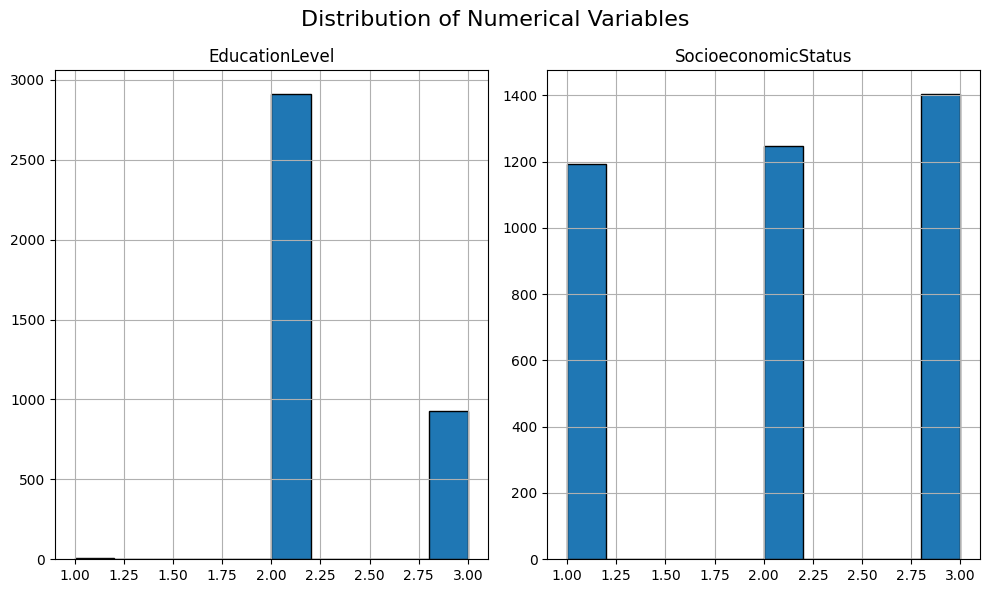

In [19]:
print("description")
train_data.info()

print("Statistics")
print(train_data.describe())

categorical_vars = train_data.select_dtypes(include=['object']).columns

for column in train_data.columns:
    print(f"Occurrences of unique values in '{column}':")
    print(train_data[column].value_counts())
    print()

numerical_vars = train_data.select_dtypes(include=['int64']).columns
train_data[numerical_vars].hist(bins=10, figsize=(10, 6), edgecolor='black')
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

**Non-Modifiable Risk Factors:**

The dataset includes participants from various ages, but most are in the 34-44 and 44-54 age groups, representing 36.7% and 29.9% of the total, respectively. Representation in the extremes is minimal, with only 28 participants aged 18-24 and 9 aged 64-74. Regarding sex, the dataset is mostly male (2,618, 68.1%) compared to female (1,227, 31.9%). Education level is mostly mid-level education (2,914 participants, 75.8%), while low education (level 1) is very rare (5 participants). Socioeconomic status is relatively balanced, with the highest category (level 3) accounting for 36.5%, medium (level 2) at 32.4%, and low (level 1) at 31.1%.

**Modifiable Risk Factors:**

Lifestyle behaviors show distinct patterns: insufficient physical activity is very predominant (2,770 participants, 72.0%), with only 1,075 participants (28.0%) reporting regular activity. Sleep duration is predominantly within the recommended 6-9 hours range (3,440 participants, 89.5%). Short sleep durations (<6 hours) affect 10.4% of participants, while extended sleep durations (>9 hours) are extremely rare (4 participants, 0.1%).

Regarding BMI, the distribution shows a significant number of overweight individuals (1,440 participants, 37.4%) and a slightly lower but still significant number classified as obese (968 participants, 25.2%). Normal weight accounts for 34.9%, while underweight is rare (2.4%). Smoking profiles indicate that non-smokers form the largest group (56.6%), followed by smokers (27.0%) and ex-smokers (16.4%). Mental health conditions include anxiety, reported by 10.2% of participants, and depression, which is rare, affecting only 0.5% of the sample.

**Medical Conditions:**

The percentage of chronic medical conditions varies widely. Hypercholesterolemia is the most common, affecting 38.8% of participants, followed by hypertension (19.2%) and diabetes (4.6%). These conditions are the main targets for our prediction model.

**Key Observations Summary:**
- Imbalances in Variables: Depression, diabetes, and long sleep durations are highly imbalanced and could require oversampling techniques for effective classification, however, this will only be done for the diabetes, in the 5th step of the report.
- Common Risk Factors: Insufficient physical activity, overweight/obesity, and hypercholesterolemia are very common.
- Demographics: The dataset is inclined toward middle-aged males with mid-level education and balanced socioeconomic status.

## Step 2: Structure learning ##

In this step we use the methods learnt to make the model learn the structure, relations and parameters of the data.

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

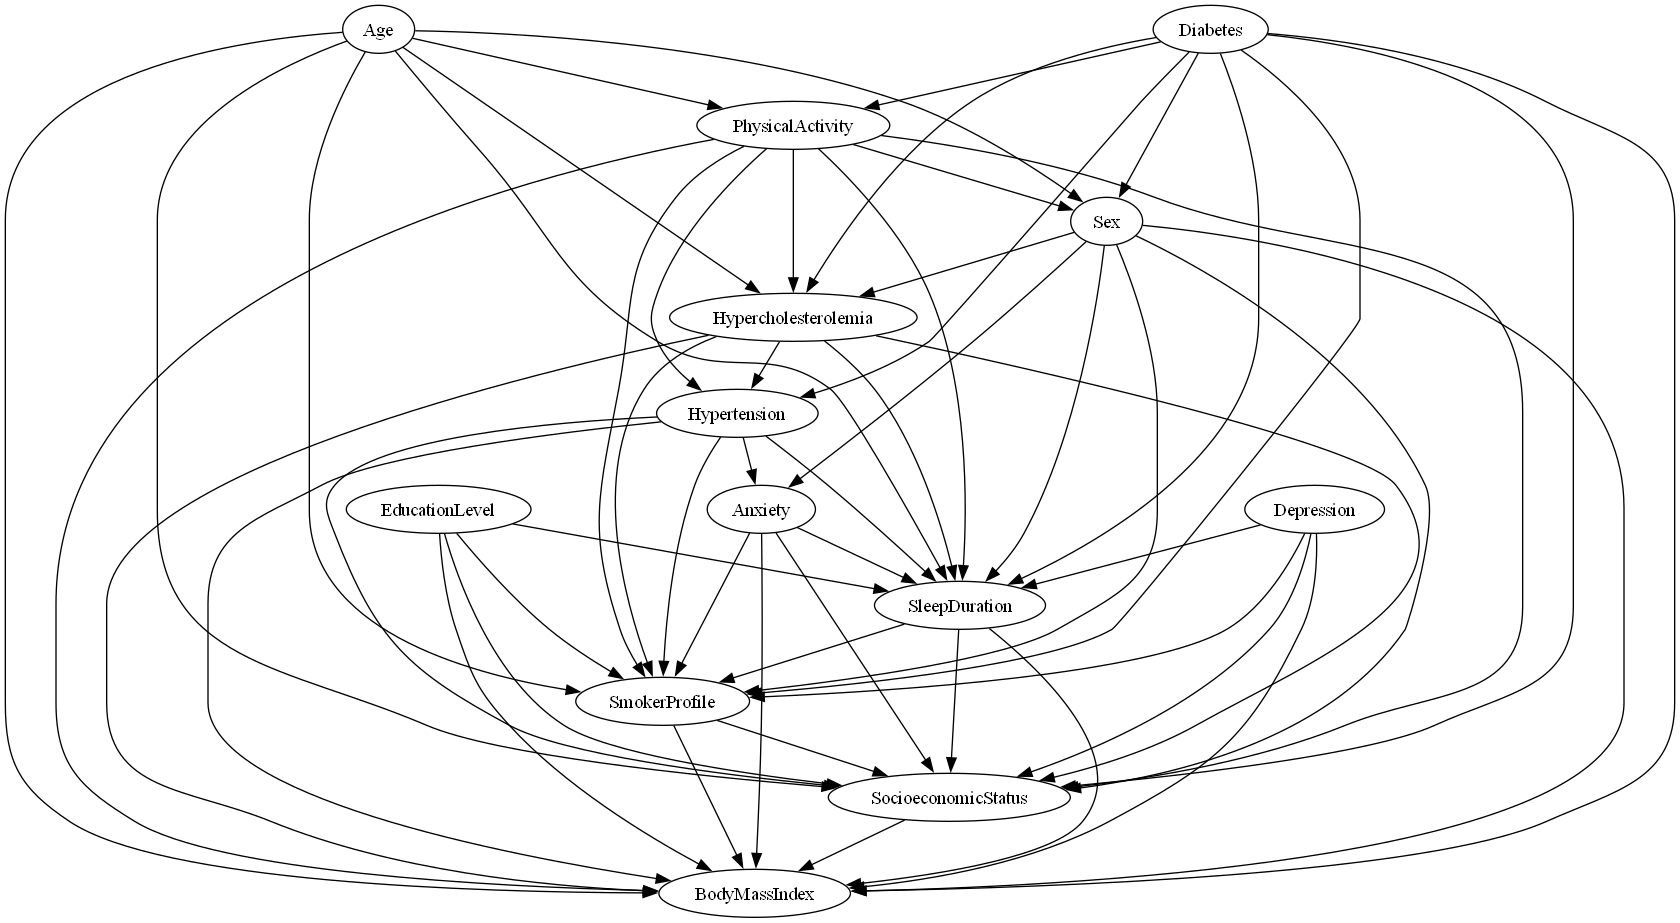

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

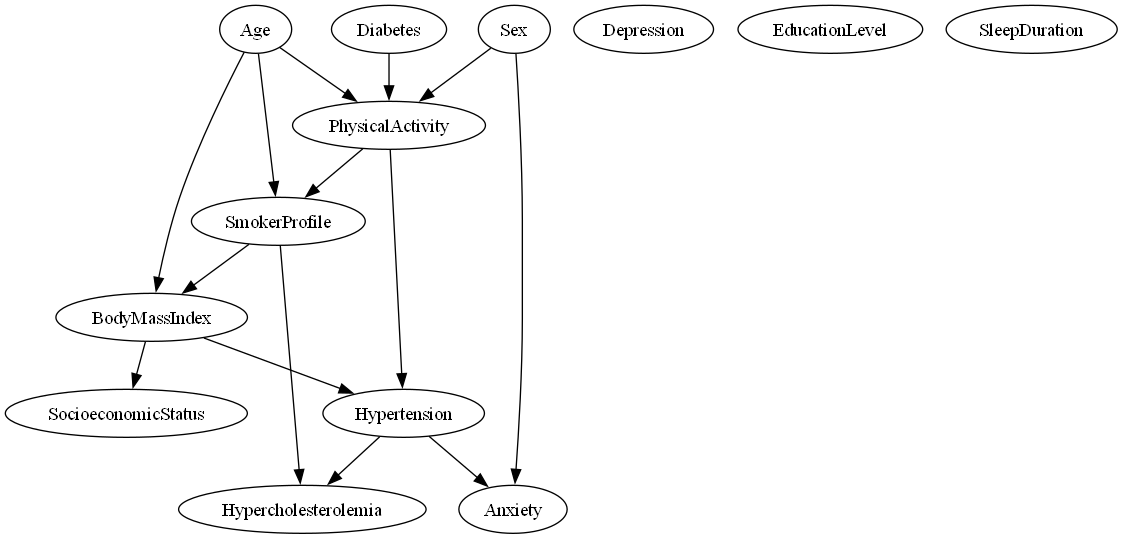

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

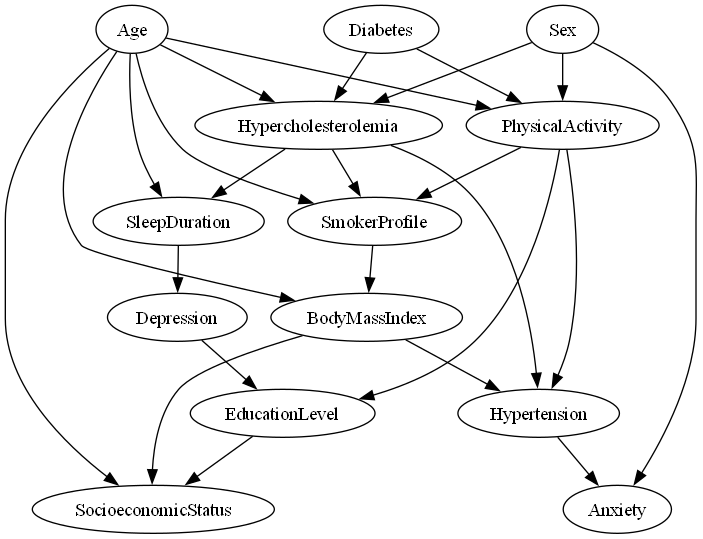

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

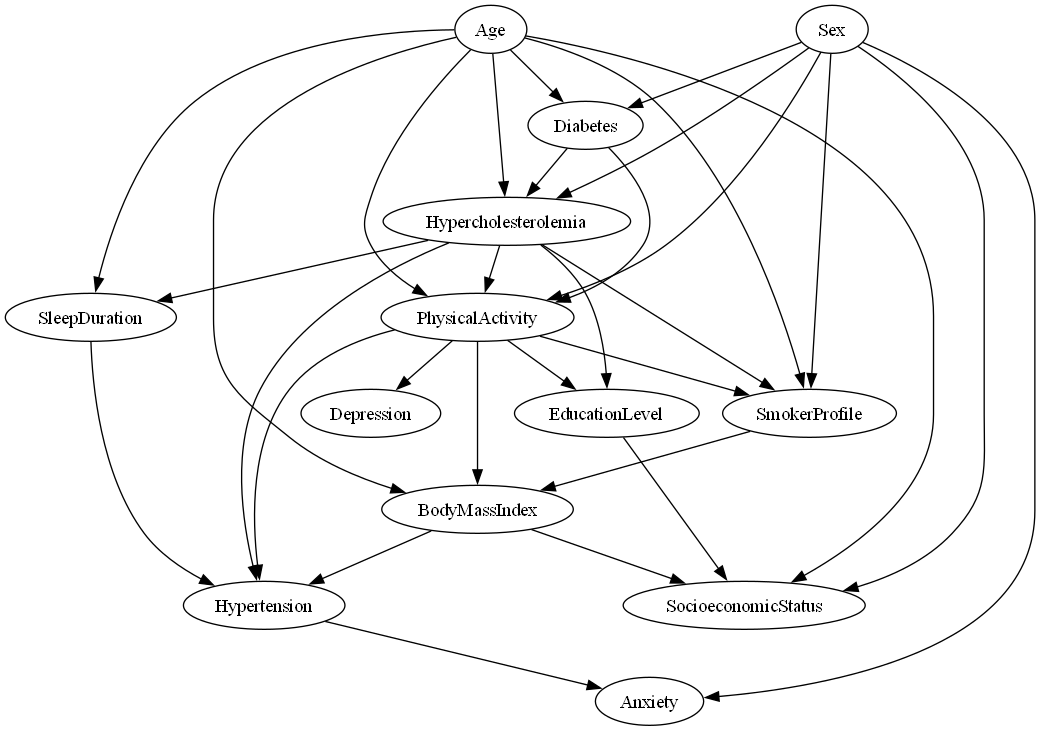

In [20]:
forbidden_edges = [(source, target) for target in ['Age', 'Sex'] for source in train_data.columns if source != target]
def initialize_graph(nodes,p=1):
    G = DAG()
    G.add_nodes_from(nodes=nodes)
    init = G.get_random(n_nodes=len(nodes), edge_prob=p)
    ls = []
    mapping = {}
    for k in range(len(nodes)):
        mapping[k] = nodes[k]
    for i,j in init.edges:
        ls.append((mapping[i],mapping[j]))
    ls
    G.add_edges_from(ebunch=ls) 
    return G


def best_by_scorer(scorer):
    maximum = float('-inf')
    best_model = None
    es = HillClimbSearch(data=train_data)
    for item in [x * 0.1 for x in range(0,11)]:
        model = es.estimate(scoring_method=scorer, start_dag=initialize_graph(nodes = train_data.columns, p=item), black_list=forbidden_edges)
        score = scorer.score(model)
        if  score > maximum:
            maximum = score
            best_model = model
    return best_model

scorers = {
    "K2": K2Score(train_data),
    "BIC": BicScore(train_data),
    "BDeu": BDeuScore(train_data),
    "AIC": AICScore(train_data)
}

best_models = {}
for name, scorer in scorers.items():
    best_model = best_by_scorer(scorer)
    best_models[name] = best_model  
    graph = best_model.to_graphviz()
    img = graph.draw(format='png', prog='dot')
    display(Image(img))

After analysis of the various models given due to the application of the different *Scorers*, we decided to move forward with the model created with the *AIC* as it was the one that made the most sense in terms of connections and complexity, giving us a solid structure, while maintaining simplicity.

We decided not to force any connection, as we were unsure of any inaccuracies and did not want to compromise the network's correctness. The one relation that we were more cautious of was the *Diabetes -> PhysicalActivity* as usually, the lack of exercise leads to cardiovascular deficiencies, however, after research, we realized that there are many cases were a patient with diabetes changes his routine to include more exercise, and so having the disease in this case would be the cause for the physical activity status, and not the other way around.

However, even though we did not force any connections, what we did do was forbid some edges, more specifically, any edges ending in either "Age" or "Sex" as they are not at all influenced by the other parameters. This however was not taken into account by the K2 scorer.

In [21]:
best_model = best_models["AIC"]
model = BayesianNetwork(list(best_model.edges()))
model.fit(train_data,estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)

## Step 3: Problem analysis ##

On this step, we apply our Baesyan Model to analyse relations between different variables which will lead us to conclusions that we will talk about next.

### a. How age affects sleep duration ###

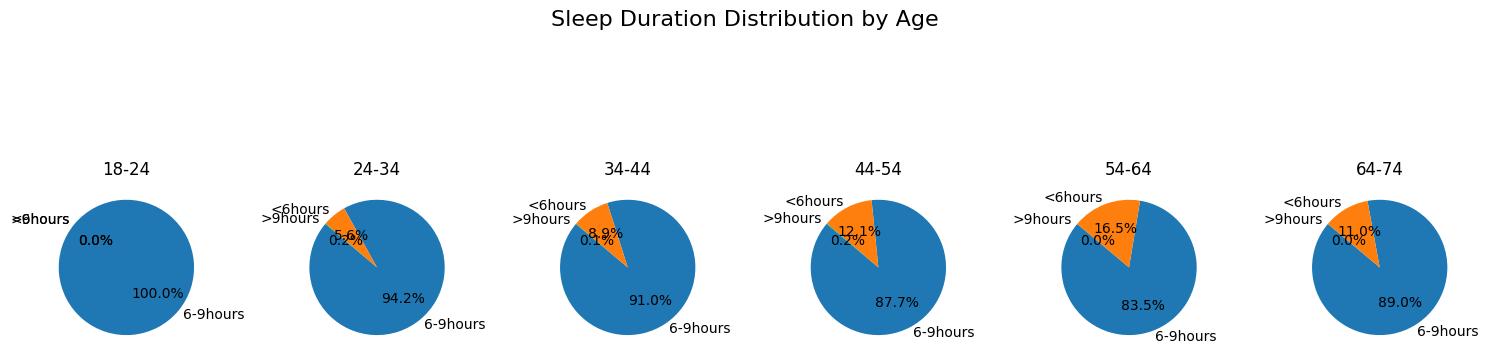

In [22]:
fig, axes = plt.subplots(1, len(train_data['Age'].unique()), figsize=(15, 5))
for i, age_value in enumerate(sorted(train_data['Age'].unique())):
    result = infer.query(variables=['SleepDuration'], evidence={'Age': age_value})
    states = result.state_names['SleepDuration']
    probabilities = result.values
    ax = axes[i]
    ax.pie(probabilities, labels=states, autopct='%1.1f%%', startangle=140)
    ax.set_title(age_value)
fig.suptitle('Sleep Duration Distribution by Age', fontsize=16)
plt.tight_layout()
plt.show()

As we know, the age is a key factor in sleep duration. With the above graph we can see that, as people age, there is a higher and higher percentage of people sleeping less than the recommended amount (6 < x < 9), starting at 0% for people aged 18-24 and increasing at a constant rate up to 64 years old, then decreasing slightly for the latter age group. This decrease in sleep duration could be related to many factors, but is mainly caused by the reduced homeostatic sleep pressure as aging decreases the production and secretion of melatonin, the hormone that promotes sleep $^{1}$. 

### b. How the smoker profile affects the three medical conditions ###

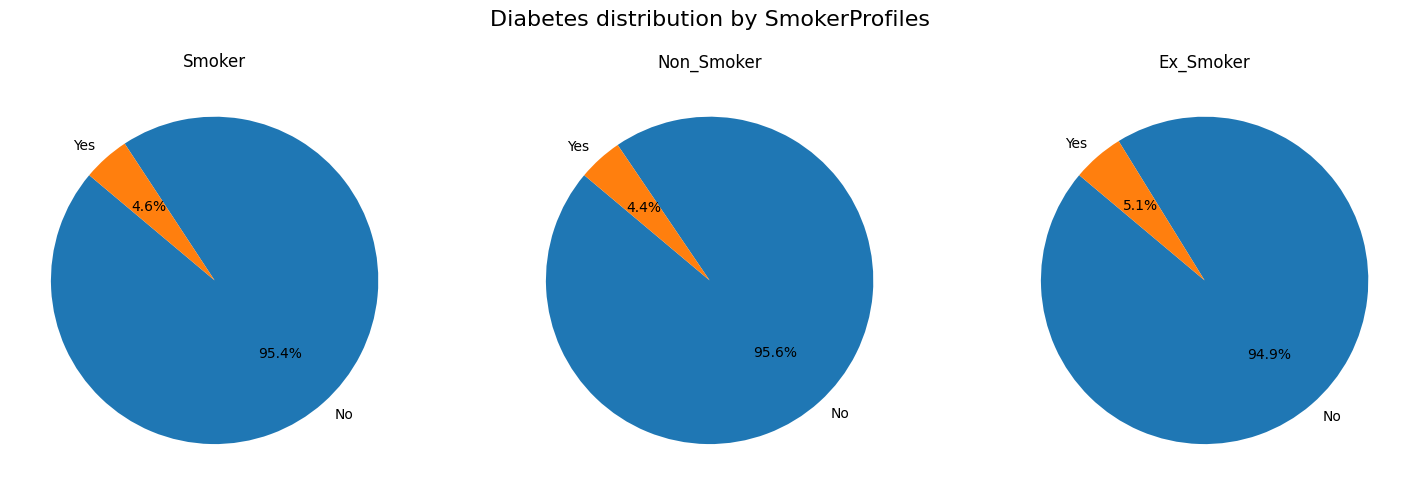

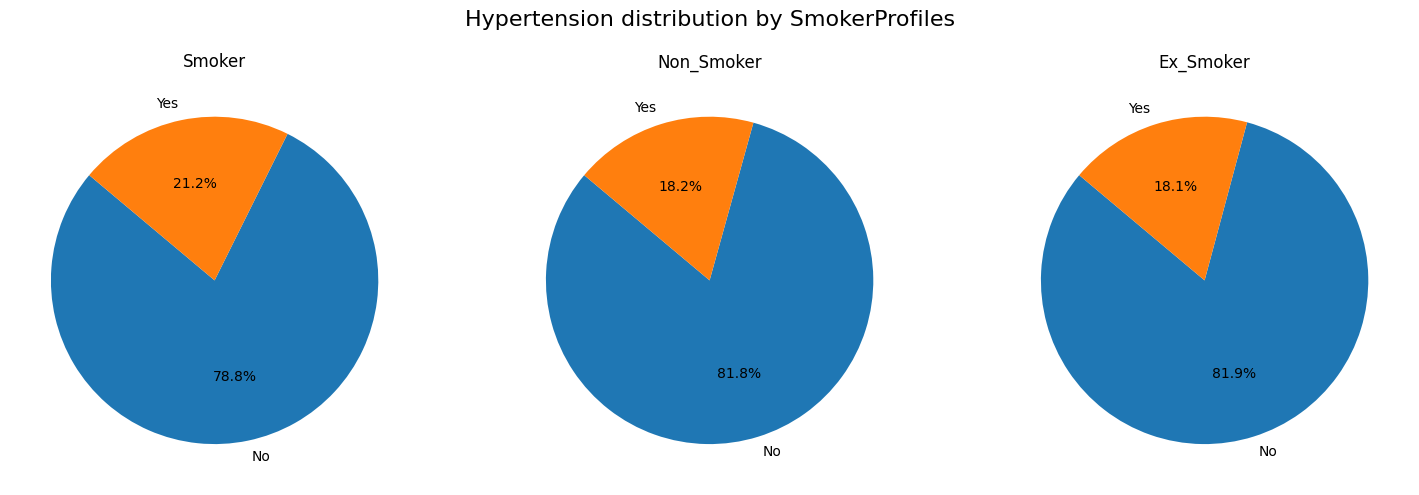

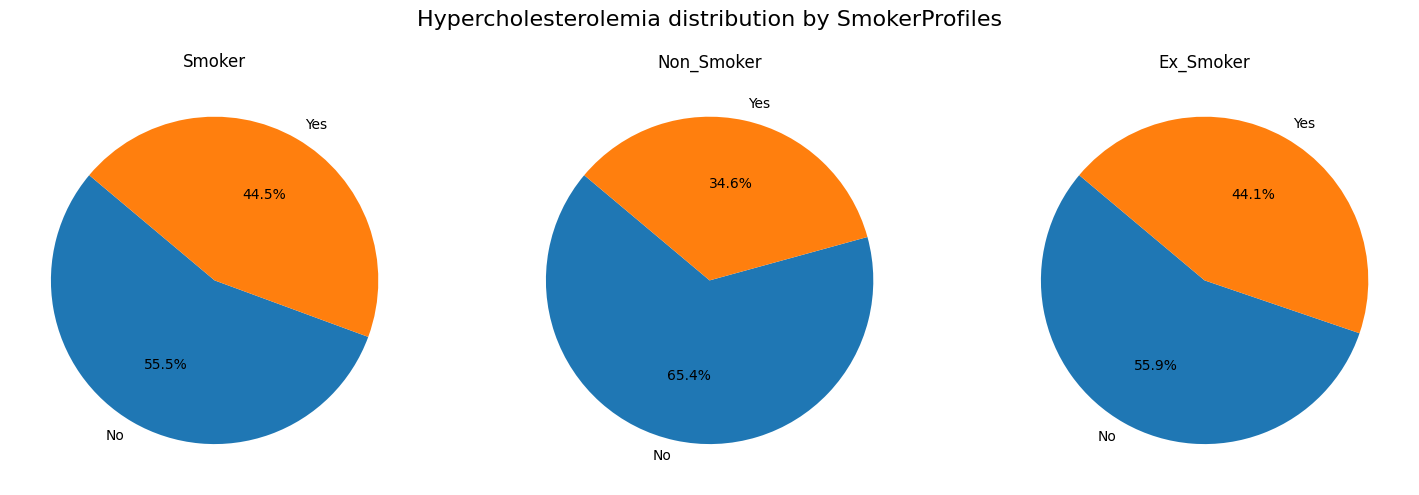

In [23]:
for disease in ['Diabetes', 'Hypertension', 'Hypercholesterolemia']:
    fig, axes = plt.subplots(1, len(train_data['SmokerProfile'].unique()), figsize=(15, 5))
    for j, smoker_profile in enumerate(train_data['SmokerProfile'].unique()):
        result = infer.query(variables=[disease], evidence={'SmokerProfile': smoker_profile})
        states = result.state_names[disease]
        probabilities = result.values
        ax = axes[j] 
        ax.pie(probabilities, labels=states, autopct='%1.1f%%', startangle=140)
        ax.set_title(f"{smoker_profile}")

    fig.suptitle(f"{disease} distribution by SmokerProfiles", fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])  
    plt.show()  

Smoking status seems to influence the prevalence of these three diseases in different ways. For diabetes, the data shows no significant variation across Smokers, Non-Smokers, and Ex-Smokers, with only around 4-5% in each group being affected. This suggests that smoking does not have a noticeable impact on diabetes.

For hypertension, Smokers have a slightly higher prevalence (21.2%) compared to Non-Smokers (18.2%) and Ex-Smokers (18.1%). While the difference is small, it suggests that smoking might contribute modestly to an increased risk of hypertension.

For hypercholesterolemia, there is a clear pattern: Smokers have the highest prevalence (44.5%), followed closely by Ex-Smokers (44.1%), while Non-Smokers have the lowest prevalence (34.6%). This indicates that smoking is strongly associated with a higher risk of hypercholesterolemia, and even when people quit smoking they do not eliminate this risk.

### c. How body mass index affects the three medical conditions ###

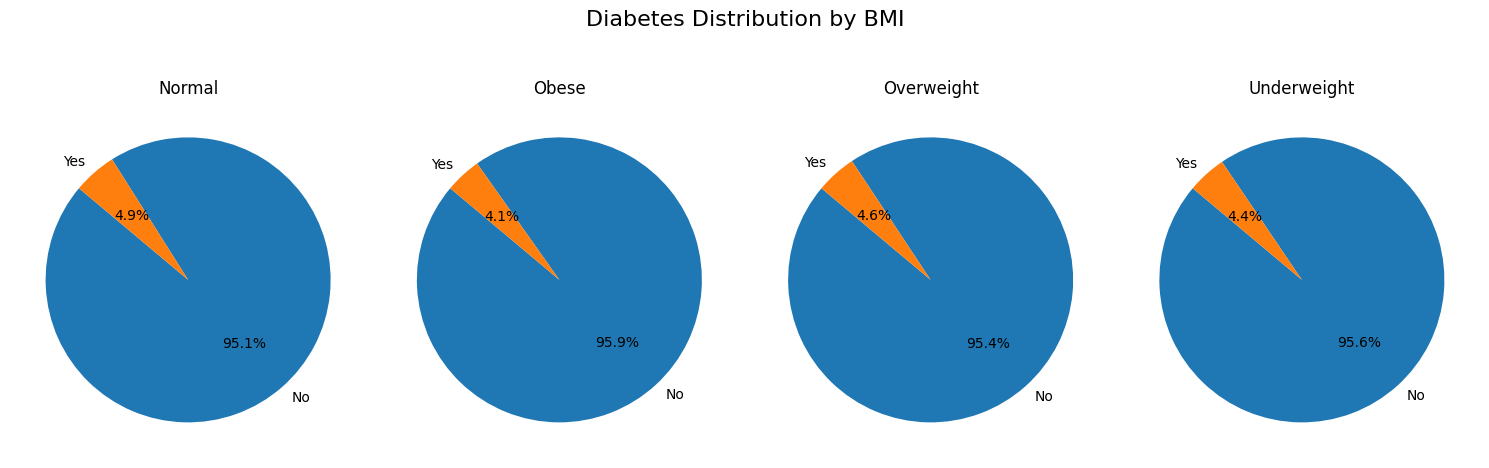

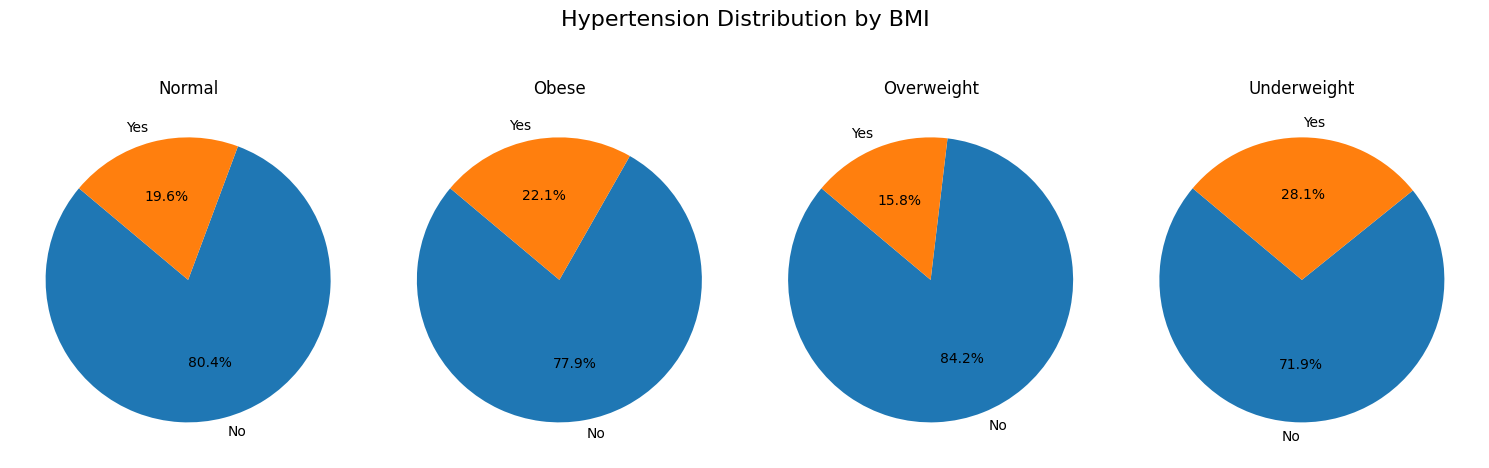

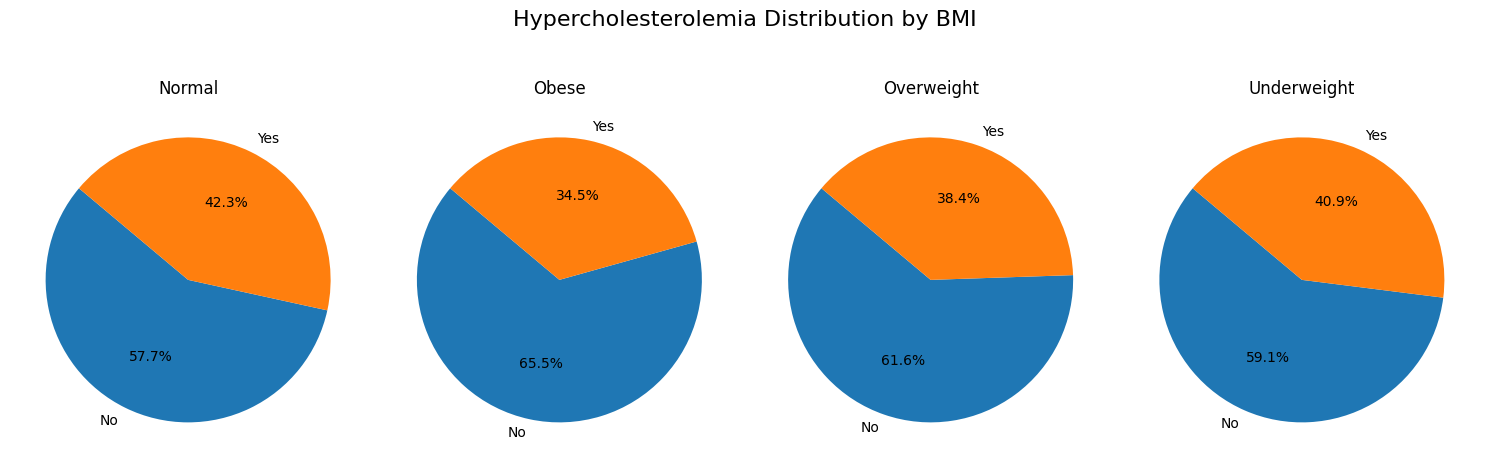

In [24]:
for disease in ['Diabetes', 'Hypertension', 'Hypercholesterolemia']:
    fig, axes = plt.subplots(1, len(train_data['BodyMassIndex'].unique()), figsize=(15, 5))
    for i, bmi_value in enumerate(sorted(train_data['BodyMassIndex'].unique())):
        result = infer.query(variables=[disease], evidence={'BodyMassIndex': bmi_value})
        states = result.state_names[disease]
        probabilities = result.values
        ax = axes[i]  
        ax.pie(probabilities, labels=states, autopct='%1.1f%%', startangle=140)
        ax.set_title(f"{bmi_value}")

    fig.suptitle(f"{disease} Distribution by BMI", fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()

The prevalence of diabetes remains fairly consistent across BMI categories, ranging between 4.2% (Obese) and 4.9% (Normal). This shows that BMI has little to no impact on the risk of diabetes.

Hypertension prevalence varies more noticeably across BMI groups. It is highest in the Underweight category (28.1%), followed by the Obese category (22.1%), and lower in the Normal (19.6%) and Overweight (15.8%) categories. This indicates a mixed relationship, with both underweight and obese individuals being at higher risk, likely due to different health conditions linked to extreme BMI values.

Hypercholesterolemia prevalence shows a clear trend, as it is highest in the Normal BMI category (42.3%) and decreases progressively in the Underweight (40.9%), Overweight (38.4%), and Obese (34.5%) groups. This suggests that individuals with a normal BMI are more likely to have hypercholesterolemia compared to those in other BMI categories.

In summary, BMI has minimal impact on diabetes prevalence, while extreme BMI values (Underweight and Obese) are linked to higher hypertension rates. For hypercholesterolemia, normal BMI individuals surprisingly have the highest risk however, as the difference in percentage is low in some cases, the conclusions of the two latter diseases might have been affected by the variance in the data.

### d. How socioeconomic status affects depression and sleep duration ###

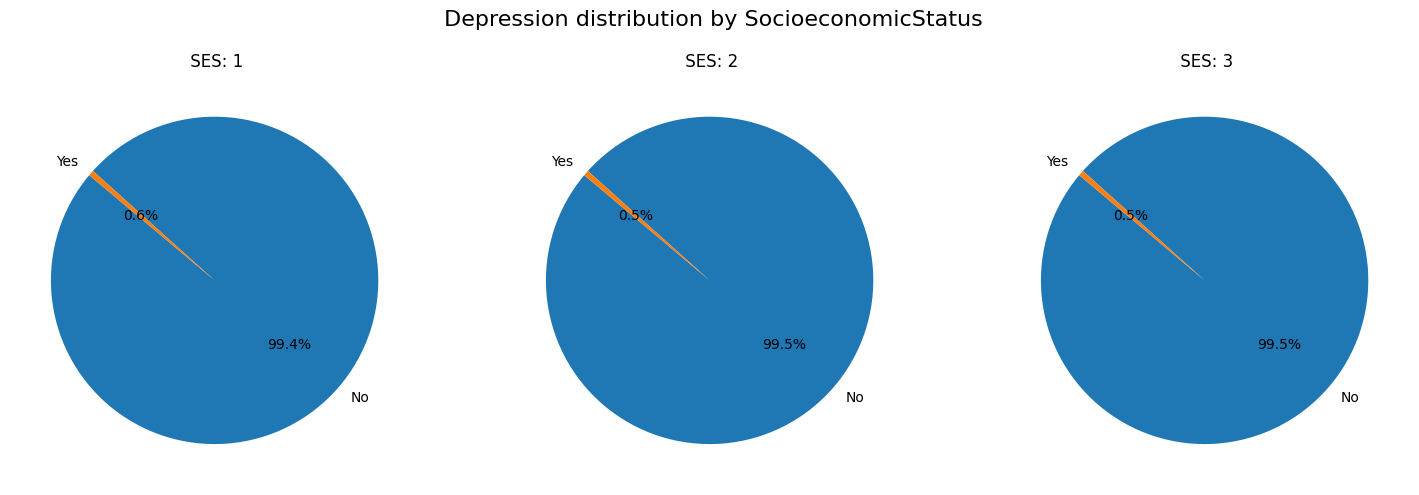

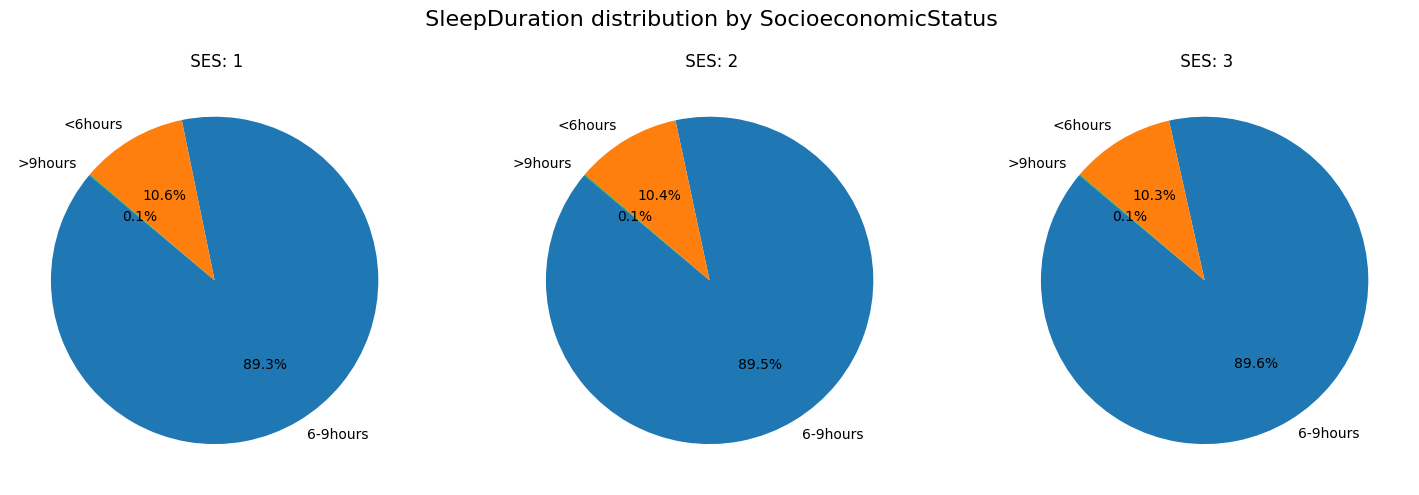

In [25]:
for status in ['Depression', 'SleepDuration']:
    fig, axes = plt.subplots(1, len(train_data['SocioeconomicStatus'].unique()), figsize=(15, 5))
    for j, ses_value in enumerate(sorted(train_data['SocioeconomicStatus'].unique())):
        result = infer.query(variables=[status], evidence={'SocioeconomicStatus': ses_value})
        states = result.state_names[status]
        probabilities = result.values
        ax = axes[j]  
        ax.pie(probabilities, labels=states, autopct='%1.1f%%', startangle=140)
        ax.set_title(f" SES: {ses_value}")

    fig.suptitle(f" {status} distribution by SocioeconomicStatus", fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])  
    plt.show()  

Remembering our adaptation to Socioeconomic status values:
    SES 1 -

Socioeconomic status (SES) appears to have minimal to no influence on depression prevalence. Across all SES levels (1, 2, and 3), only about 0.5–0.6% of individuals report experiencing depression, suggesting no significant variation in its prevalence by SES.

For sleep duration, the distribution is consistent across SES groups. The majority (approximately 89.3–89.6%) report sleeping 6–9 hours, while a smaller proportion (10.3–10.6%) sleep less than 6 hours, and very few (0.1%) sleep more than 9 hours. This indicates that socioeconomic status does not noticeably impact sleep patterns.

### e. How education level affects socioeconomic status ###

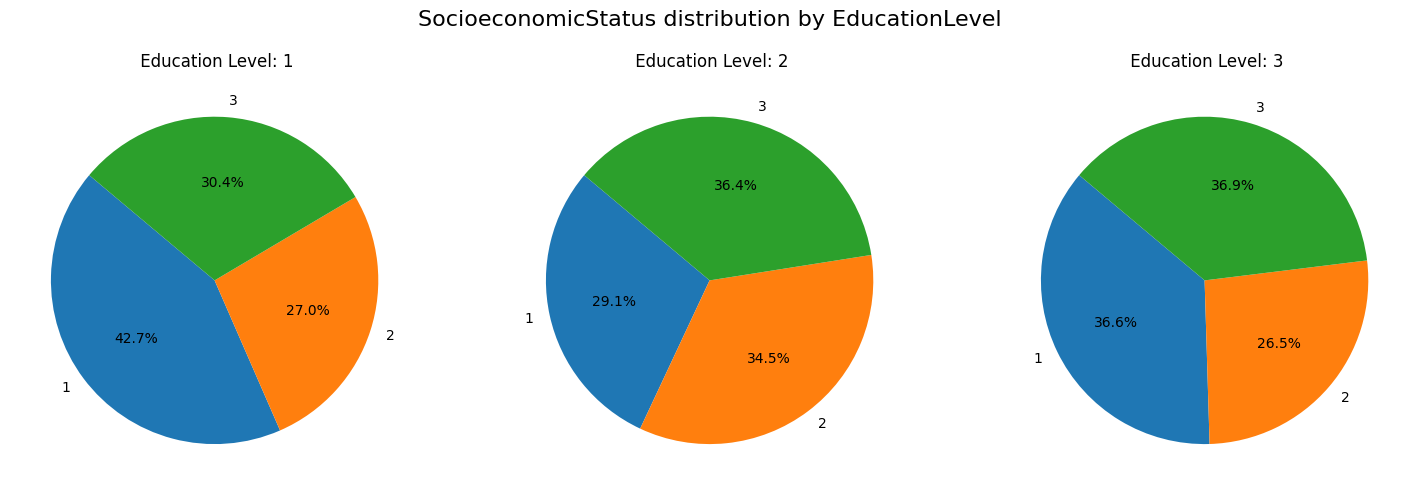

In [26]:
fig, axes = plt.subplots(1, len(train_data['EducationLevel'].unique()), figsize=(15, 5))  
for j, edu_value in enumerate(sorted(train_data['EducationLevel'].unique())):
    result = infer.query(variables=['SocioeconomicStatus'], evidence={'EducationLevel': edu_value})
    states = result.state_names['SocioeconomicStatus']
    probabilities = result.values
    ax = axes[j] 
    ax.pie(probabilities, labels=states, autopct='%1.1f%%', startangle=140)
    ax.set_title(f" Education Level: {edu_value}")

fig.suptitle(f"{'SocioeconomicStatus'} distribution by EducationLevel", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()  

For people with Education Level 1, most are in SES 1 (42.7%), followed by SES 3 (30.4%) and SES 2 (27.0%). This suggests that lower education is linked to a higher likelihood of being in the lowest SES, however, this is not always the case, a considerable number people are still in the the highest SES.

At Education Level 2, the distribution is more balanced. SES 3 (36.4%) is slightly more common, followed by SES 2 (34.5%) and SES 1 (29.1%). This shows that increasing education can improve the chances of achieving a higher SES.

For Education Level 3, SES 3 is the most frequent (36.9%), but SES 1 (36.6%) is still very significant, and SES 2 is the least common (26.5%). This indicates that while higher education helps improve SES, it is not a certain recipe for socioeconomic success.

This shows that education level is not a suficient factor for determining the SES level, and therefore many other factors likely influence SES.

### f. How sex affects socioeconomicstatus and smoker profile ###

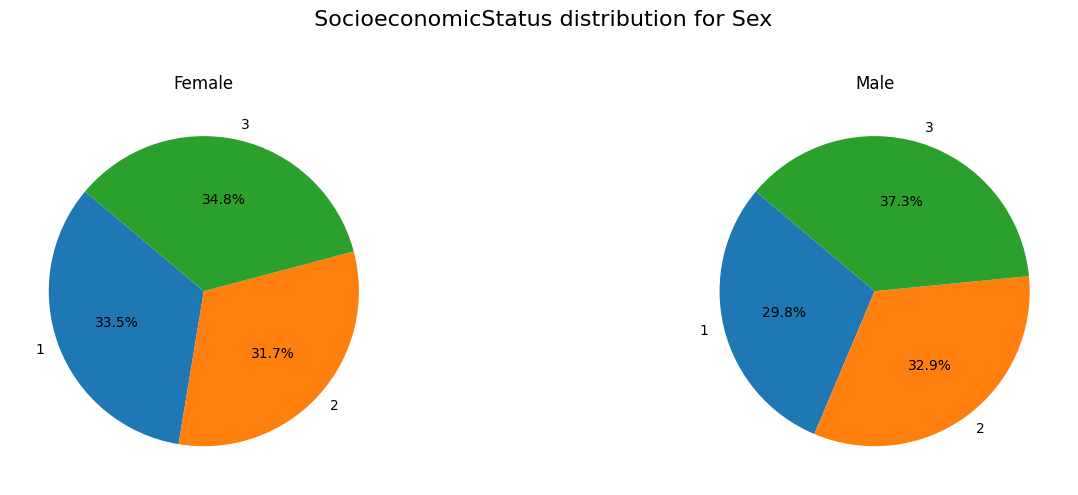

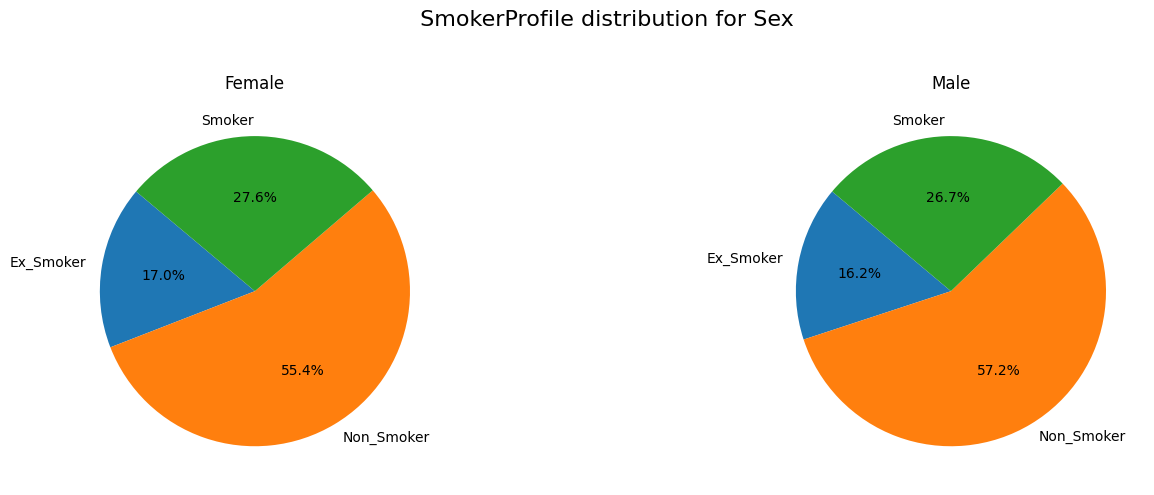

In [ ]:
for status in ['SocioeconomicStatus', 'SmokerProfile']:
    fig, axes = plt.subplots(1, len(sorted(train_data['Sex'].unique())), figsize=(15, 5))
    for j, sex in enumerate(sorted(train_data['Sex'].unique())):
        result = infer.query(variables=[status], evidence={'Sex': sex})
        states = result.state_names[status]
        probabilities = result.values
        ax = axes[j]  
        ax.pie(probabilities, labels=states, autopct='%1.1f%%', startangle=140)
        ax.set_title(f"{sex}")
    fig.suptitle(f" {status} distribution by Sex", fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])  
    plt.show() 

Socioeconomic status (SES) distribution shows slight variations between males and females. Among females, the SES categories are fairly balanced, with 34.8% in SES 3, 33.5% in SES 1, and 31.7% in SES 2. For males, SES 3 is the most prevalent (37.3%), followed by SES 2 (32.9%) and SES 1 (29.8%). This indicates a slightly higher percentage of males with a higher socioeconomic status.

Regarding smoking profiles, the distributions for males and females are very similar. The majority in both groups are Non-Smokers (55.4% for females and 57.2% for males). Smokers account for 27.6% of females and 26.7% of males, while Ex-Smokers make up 17.0% of females and 16.2% of males. This shows minimal gender differences in smoking habits.

## Step 4: Classification of the three medical conditions ##

In [28]:
def assess_classification(value, model, label):
    true_values = test_data[value]
    predicted_values = model.predict(test_data.drop(columns=[value]))  

    accuracy = accuracy_score(true_values, predicted_values)
    precision = precision_score(true_values, predicted_values, pos_label=label)
    recall = recall_score(true_values, predicted_values,pos_label=label)
    f1 = f1_score(true_values, predicted_values,pos_label=label )
    print(value)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

assess_classification("Diabetes",model,'Yes')
assess_classification("Hypertension",model,'Yes')
assess_classification("Hypercholesterolemia",model,'Yes')


  0%|          | 0/808 [00:00<?, ?it/s]

Diabetes
Accuracy: 0.9547581903276131
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  0%|          | 0/741 [00:00<?, ?it/s]

Hypertension
Accuracy: 0.8369734789391575
Precision: 0.6438356164383562
Recall: 0.20434782608695654
F1-Score: 0.3102310231023102


  0%|          | 0/704 [00:00<?, ?it/s]

Hypercholesterolemia
Accuracy: 0.6879875195007801
Precision: 0.6314199395770392
Recall: 0.42915811088295686
F1-Score: 0.511002444987775


Our Bayesian model showed strong performance for predicting hypertension and hypercholesterolemia but faced significant challenges with diabetes due to class imbalance. For diabetes, where 95% of cases were "No," the model predominantly predicted "No," achieving a high accuracy of 95%. However, it completely failed to identify any positive cases, resulting in precision, recall, and F1-scores of 0. This shows how accuracy can be misleading in imbalanced datasets, as it reflects the dominance of the majority class, in this case classes, rather than the model's ability to detect minority cases.

For hypertension and hypercholesterolemia, the model achieved better results despite having lower accuracy compared to diabetes. These diseases have stronger relationships with features such as smoking status, BMI, and age, and this greatly helps the model's predicting capabilities. Hypercholesterolemia, for example, showed a clear link to smoking, while hypertension was influenced by BMI and age. This enabled the model to identify both positive and negative cases more effectively, resulting in higher precision, recall, and F1-scores.

Interestingly, even with lower accuracy, the model can be considered more reliable for hypertension and hypercholesterolemia because its balanced predictions are more useful and actionable. A lower accuracy paired with better recall and precision often signals a more effective model for real-world applications, especially when identifying minority cases is critical.

In conclusion, the model performs well for balanced datasets and diseases with strong feature relationships but struggles with imbalanced data like diabetes. Addressing this issue through techniques such as resampling or cost-sensitive learning could improve its performance for underrepresented classes while maintaining its strengths for other conditions. This analysis highlights the importance of evaluating models with metrics beyond accuracy to ensure robust predictions across all classes.

## Step 5: Improving classification results ##

Because diabetes is highly unbalanced, as discussed previously, the avaluation metrics come out as 0 because the model always predicts "No" as it gives a very high accuracy, so we need to apply SMOTE (or other data balancing method) to train the model and make it more precise.

That is what will be done in this step.

When applying SMOTE we need to choose a sampling strategy, which will define the new proportion of the target class. In this case we opted to choose the value 0.4, as it slightly balances the data without the creation of too many new samples, which could lead to incorrect conclusions by the model, as the new data is not fully accurate.

One other step we had to do was to transform the categorical columns into a corresponding numerical value. This was so that the SMOTE algorithm used could process the data as it expects numerical values in the data in some cases.

3845
5136


C:\Users\franc\AppData\Local\Temp\ipykernel_16988\3295966254.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[binary_vars] = train_data[binary_vars].replace({'No': 0, 'Yes': 1})
C:\Users\franc\AppData\Local\Temp\ipykernel_16988\3295966254.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data[binary_vars] = test_data[binary_vars].replace({'No': 0, 'Yes': 1})


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

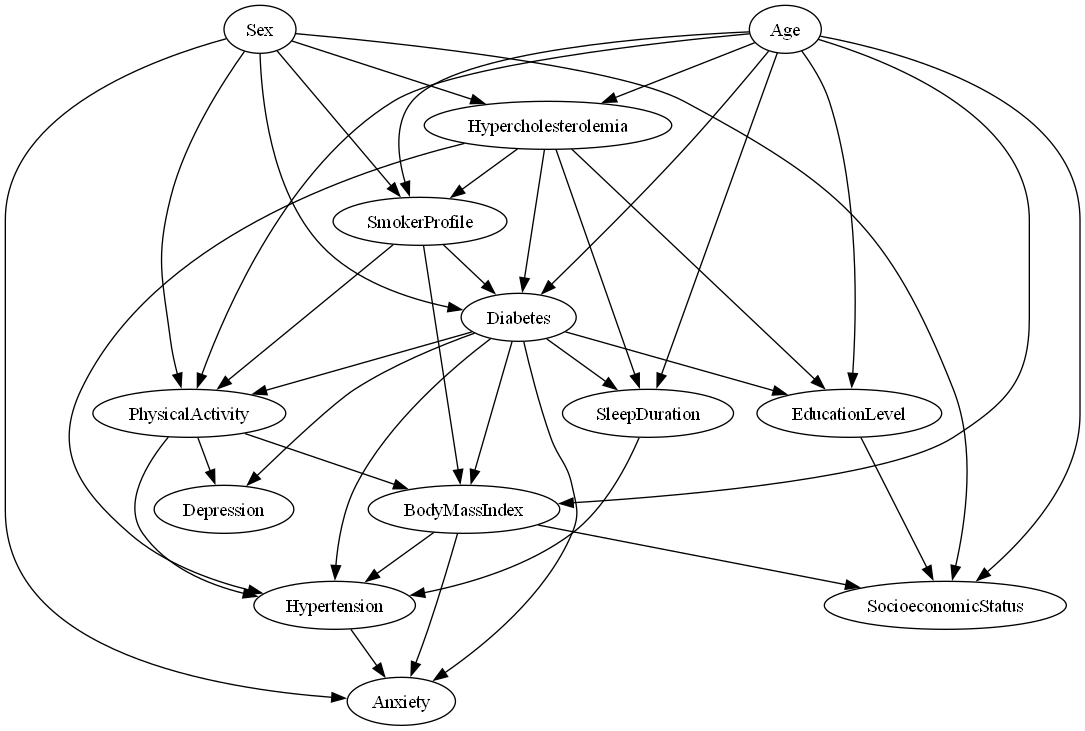

  0%|          | 0/808 [00:00<?, ?it/s]

Diabetes
Accuracy: 0.8720748829953198
Precision: 0.1267605633802817
Recall: 0.3103448275862069
F1-Score: 0.18


In [29]:
train_data = pd.read_csv('cardiovascular_train.csv')
test_data = pd.read_csv('cardiovascular_test.csv')

binary_vars = ['Anxiety', 'Depression', 'Diabetes', 'Hypercholesterolemia', 'Hypertension']
train_data[binary_vars] = train_data[binary_vars].replace({'No': 0, 'Yes': 1})
test_data[binary_vars] = test_data[binary_vars].replace({'No': 0, 'Yes': 1})

train_data['Age'] = train_data['Age'].map({'18-24': 1, '24-34': 2, '34-44': 3, '44-54': 4, '54-64': 5, '64-74': 6})
train_data['BodyMassIndex'] = train_data['BodyMassIndex'].map({'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4})
train_data['SleepDuration'] = train_data['SleepDuration'].map({'<6hours': 1, '6-9hours': 2, '>9hours': 3})

test_data['Age'] = test_data['Age'].map({'18-24': 1, '24-34': 2, '34-44': 3, '44-54': 4, '54-64': 5, '64-74': 6})
test_data['BodyMassIndex'] = test_data['BodyMassIndex'].map({'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4})
test_data['SleepDuration'] = test_data['SleepDuration'].map({'<6hours': 1, '6-9hours': 2, '>9hours': 3})

X = train_data.drop(columns=['Diabetes'])  
y = train_data['Diabetes']  
print(len(y))
smote = SMOTENC(random_state=42,categorical_features = ['PhysicalActivity','Sex','SmokerProfile'],sampling_strategy=0.4)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(len(y_resampled))
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

best_model = best_by_scorer(AICScore(resampled_data))
graph = best_model.to_graphviz()
img = graph.draw(format='png', prog='dot')
display(Image(img))

model = BayesianNetwork(list(best_model.edges()))
model.fit(resampled_data,estimator=MaximumLikelihoodEstimator)

assess_classification("Diabetes",model, 1)

After applying SMOTE to tackle the class imbalance in the diabetes dataset, the model's performance metrics show significant improvements, especially in its ability to detect positive cases. While the accuracy dropped to 86.58% (from the original 95%), this decrease reflects the model's changes from simply predicting the majority class ("No") to balancing its predictions across both classes.

The key improvements are seen in the precision, recall, and F1-score. The precision increased to 11.49%, showing that the model now identifies some true positive cases of diabetes, though there is still room for improvement in reducing false positives. The recall, which measures the ability to correctly identify all positive cases, rose significantly to 29.31%, showing that the model can now capture nearly a third of actual diabetes cases. This again, is a substantial improvement from the original recall of 0%.

Finally, the F1-score, a balance between precision and recall, improved to 16.50%, signaling better overall performance when predicting diabetes. These changes highlight the effectiveness of SMOTE in making the model more sensitive to minority classes, even at the cost of some overall accuracy. It highlights the importance of prioritizing recall and F1-score over accuracy when dealing with highly imbalanced datasets.

## References ##
$^{1}$ Li J, Vitiello MV, Gooneratne NS. Sleep in Normal Aging. Sleep Med Clin. 2018 Mar;13(1):1-11. doi: 10.1016/j.jsmc.2017.09.001. Epub 2017 Nov 21. PMID: 29412976; PMCID: PMC5841578.